In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#importing the  dataset
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [5]:
df.shape

(907, 27)

In [6]:
#Checking the data types of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
#Checking shapes of dataset
df.shape

(907, 27)

There are 907 rows and 27 columns in total in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

we are able to observe in the columns

other_fuel3,
wepp_id,
generation_gwh_2013,
generation_gwh_2019,
estimated_generation_gwh

has all null values.so we can drop these columns as it has no meaning to the model. 

we can see in the column other_fuel2 has only one non null values and rest are null values.So we can also drop that column as well,as it will have no relation with the model.

In [10]:
#Droping unnecessary columns
df.drop(columns=['other_fuel3','wepp_id','generation_gwh_2013',
                 'generation_gwh_2019','estimated_generation_gwh','other_fuel2'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [12]:

df.country.nunique()

1

In [13]:
df.country_long.nunique()

1

In [14]:
df.generation_data_source.nunique()

1

In [15]:
df.drop(columns=['country','country_long','generation_data_source'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   907 non-null    object 
 1   gppd_idnr              907 non-null    object 
 2   capacity_mw            907 non-null    float64
 3   latitude               861 non-null    float64
 4   longitude              861 non-null    float64
 5   primary_fuel           907 non-null    object 
 6   other_fuel1            198 non-null    object 
 7   commissioning_year     527 non-null    float64
 8   owner                  342 non-null    object 
 9   source                 907 non-null    object 
 10  url                    907 non-null    object 
 11  geolocation_source     888 non-null    object 
 12  year_of_capacity_data  519 non-null    float64
 13  generation_gwh_2014    398 non-null    float64
 14  generation_gwh_2015    422 non-null    float64
 15  genera

In [17]:

#lets check count in the name column 
df['name'].nunique()

907

we can see all the rows in the column are unique values ,we can drop this column as well

In [18]:
df['gppd_idnr'].nunique()

907

we can see all the rows in the column are unique values ,we can drop this column as well

In [19]:
df['url'].nunique()

304

In [20]:
df['url'].value_counts()

http://www.cea.nic.in/                                                                                                                                                                                                                            519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                                                                                                                                                     7
http://www.ntpc.co.in                                                                                                                                                                                                                               6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                                                                                                                                                    5
http://www.mahau

we can drop this column as well as this column wont have any input for prediction in the model

In [21]:
df["owner"].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

we can drop this column as well as this column wont have any any input for prediction in the model

In [22]:
#dropping unwanted columns
df.drop(columns=['name','gppd_idnr','owner'],axis=1,inplace=True)

In [23]:
df.drop('url',axis=1,inplace=True)

In [24]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.500,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.000,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.200,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.000,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.000,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.000,23.7689,68.6447,Coal,Oil,2005.0,Central Electricity Authority,WRI,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.000,10.4547,77.0078,Hydro,NaN,1970.0,Central Electricity Authority,WRI,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.000,32.2258,77.2070,Hydro,NaN,2010.0,Central Electricity Authority,WRI,2019.0,674.391100,721.335200,675.724400,679.594950,579.318850
8,290.000,16.3300,75.8863,Hydro,NaN,2004.0,Central Electricity Authority,WRI,2019.0,480.594950,144.434200,402.029750,439.372100,406.377900
9,210.000,23.1642,81.6373,Coal,Oil,2008.0,Central Electricity Authority,WRI,2019.0,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000


# Null values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            907 non-null    float64
 1   latitude               861 non-null    float64
 2   longitude              861 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   other_fuel1            198 non-null    object 
 5   commissioning_year     527 non-null    float64
 6   source                 907 non-null    object 
 7   geolocation_source     888 non-null    object 
 8   year_of_capacity_data  519 non-null    float64
 9   generation_gwh_2014    398 non-null    float64
 10  generation_gwh_2015    422 non-null    float64
 11  generation_gwh_2016    434 non-null    float64
 12  generation_gwh_2017    440 non-null    float64
 13  generation_gwh_2018    448 non-null    float64
dtypes: float64(10), object(4)
memory usage: 99.3+ KB


In [26]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1              709
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

we can also drop the column other_fuel1 as it contains only 198 values rest are null values.


In [27]:
#dropping the  columns with null values
df.drop(columns=['other_fuel1'],axis=1,inplace=True)

In [28]:
df.year_of_capacity_data.nunique()

1

In [29]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [30]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

# lets fill the null values


In [31]:
#Replacing NaN values in numerical columns
df.latitude  =  df.latitude.fillna(df.latitude.mode()[0])

df.commissioning_year = df.commissioning_year.fillna(df.commissioning_year.median())
df.year_of_capacity_data = df.year_of_capacity_data.fillna(df.year_of_capacity_data.median())
df.geolocation_source = df.geolocation_source.fillna(df.geolocation_source.mode()[0])     

In [32]:
df.longitude  =  df.longitude.fillna(df.longitude.mode()[0])

In [33]:
df.generation_gwh_2014 = df.generation_gwh_2014.fillna(df.generation_gwh_2014.median())
df.generation_gwh_2015 = df.generation_gwh_2015.fillna(df.generation_gwh_2015.median())
df.generation_gwh_2016 = df.generation_gwh_2016.fillna(df.generation_gwh_2016.median())
df.generation_gwh_2017 = df.generation_gwh_2017.fillna(df.generation_gwh_2017.median())
df.generation_gwh_2018 = df.generation_gwh_2018.fillna(df.generation_gwh_2018.median())

In [34]:
#Checking null values in the dataset
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

lets try to get a difference of commisioning year and the year of capacity column 'Years_of_Operation'  and create a new column which will give meaningful data

In [35]:
df['Years_of_Operation']=(df.year_of_capacity_data)-(df.commissioning_year)

now lets frop the commissioning_year and year_of_capacity_data as we have the combined meaningful data from Years_of_Operation column 

In [36]:
#dropping the  columns 
df.drop(columns=['commissioning_year'],axis=1,inplace=True)

In [37]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [38]:
df['average_production_2013-2017']=(df['generation_gwh_2014']+df['generation_gwh_2015']+df['generation_gwh_2016']+df['generation_gwh_2017']+df['generation_gwh_2018'])/5


In [39]:
df.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1,inplace=True)

In [40]:
start

NameError: name 'start' is not defined

# we have successfully removed all the columns with empty rows and treated the null calues adequately  

In [41]:
df

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,2.500,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,8.0,763.826415
1,98.000,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,18.0,763.826415
2,39.200,21.9038,69.3732,Wind,CDM,WRI,18.0,763.826415
3,135.000,23.8712,91.3602,Gas,Central Electricity Authority,WRI,15.0,727.510864
4,1800.000,21.9603,82.4091,Coal,Central Electricity Authority,WRI,4.0,5571.899947
5,250.000,23.7689,68.6447,Coal,Central Electricity Authority,WRI,14.0,1132.521200
6,60.000,10.4547,77.0078,Hydro,Central Electricity Authority,WRI,49.0,101.826310
7,192.000,32.2258,77.2070,Hydro,Central Electricity Authority,WRI,9.0,666.072900
8,290.000,16.3300,75.8863,Hydro,Central Electricity Authority,WRI,15.0,374.561780
9,210.000,23.1642,81.6373,Coal,Central Electricity Authority,WRI,11.0,1584.076000


In [ ]:
df.describe()

There is a huge difference in mean and 2nd quantile of capacity_mw column which means there are extream outliers in the column.

In [ ]:
df.describe(include='O')

In [ ]:
df.shape

we have 907 rows and 7 columns after treating the datasets.

In [ ]:
#Visualising null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [ ]:
#count of each data classes in the dataset

In [ ]:
df.capacity_mw.nunique()

we have 361 unique capacity_mw in the dataset.

In [ ]:
df.latitude.nunique()

In [ ]:
df.longitude.nunique()

In [ ]:
df.primary_fuel.nunique()

In [ ]:
df.Years_of_Operation.nunique()

In [ ]:
df.source.nunique()

In [ ]:
df.geolocation_source.nunique()

In [ ]:
labl='Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil','Nuclear'
plt.figure(figsize=(10,7))
plt.pie(df.primary_fuel.value_counts(), labels=labl, autopct='%1.2f%%', shadow=True);

In [ ]:
labl=[2011., 2001., 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2006., 2007., 1988., 1973.,
       2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971., 1955.,
       2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982., 1937.,
       1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927., 1974.,
       1953.]
plt.figure(figsize=(18,10))
plt.pie(df.commissioning_year.value_counts(), labels=labl, autopct='%1.2f%%', shadow=True);

In [ ]:
df.geolocation_source.unique()

In [ ]:
labl='WRI', 'Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(10,7))
plt.pie(df.geolocation_source.value_counts(), labels=labl, autopct='%1.2f%%', shadow=True);

In [ ]:
df.geolocation_source.value_counts()

In [ ]:
#Count plot for other_fuel1
sns.countplot(df.capacity_mw)

# Encoding

In [42]:
catg=['primary_fuel','source','geolocation_source']

In [43]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[catg]= df[catg].apply(LE.fit_transform)

In [44]:
columns=df.columns

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

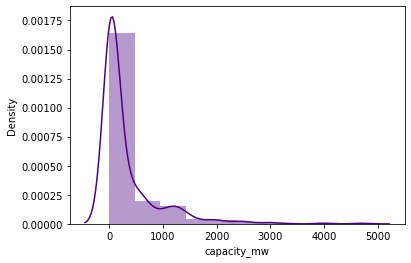

In [45]:
#Distribution plot for all numerical columns
sns.distplot(df['capacity_mw'], bins = 10, color="indigo")

In [ ]:
df.head(100)

In [ ]:
sns.distplot(df['latitude'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['longitude'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['primary_fuel'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['Years_of_Operation'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['source'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['url'], bins = 10, color="indigo")

In [ ]:
sns.distplot(df['geolocation_source'], bins = 10, color="indigo")

In [ ]:
df.columns

# Detecting Outliers

In [ ]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],data=df,color='yellow')
for i in range(0,7):
    bxplt(i)

# Removing outliers

In [46]:
#zscore

z=np.abs(zscore(df))
z

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,0.548908,1.164487,0.790446,1.225688,1.460215,1.083349,0.933076,0.279220
1,0.386977,0.603756,0.515337,0.967877,2.917019,0.394241,0.172699,0.279220
2,0.486679,0.134101,1.568043,1.664401,0.512075,0.394241,0.172699,0.279220
3,0.324240,0.456896,2.852648,0.529164,0.489662,0.394241,0.400812,0.291601
4,2.498942,0.143371,1.052946,0.967877,0.489662,0.394241,1.237227,1.359937
5,0.129245,0.440111,1.714515,0.967877,0.489662,0.394241,0.476850,0.153525
6,0.451410,1.744371,0.033036,0.090451,0.489662,0.394241,2.184471,0.504907
7,0.227590,1.827648,0.007015,0.090451,0.489662,0.394241,0.857038,0.312546
8,0.061421,0.780401,0.258524,0.090451,0.489662,0.394241,0.400812,0.411927
9,0.197070,0.340897,0.897768,0.967877,0.489662,0.394241,0.704963,0.000418


In [47]:
#printing the outliers points in the dataset
threshold=3
print(np.where(z>3))

(array([ 15,  15,  71,  80, 143, 143, 147, 179, 183, 191, 209, 209, 219,
       222, 244, 299, 308, 308, 321, 323, 333, 340, 342, 345, 360, 363,
       364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
       494, 494, 499, 519, 538, 541, 573, 577, 583, 592, 601, 621, 638,
       648, 648, 657, 657, 661, 669, 689, 695, 695, 706, 709, 721, 724,
       726, 726, 728, 767, 786, 786, 788, 807, 808, 808, 818, 832, 848,
       870, 871, 879, 880, 880, 895, 900], dtype=int64), array([0, 7, 4, 4, 0, 7, 0, 2, 2, 4, 0, 7, 6, 6, 2, 4, 0, 7, 4, 2, 2, 2,
       6, 4, 2, 0, 0, 7, 6, 0, 2, 2, 6, 6, 6, 0, 6, 0, 7, 0, 7, 2, 2, 6,
       6, 6, 2, 6, 6, 6, 6, 2, 0, 7, 0, 7, 4, 4, 4, 0, 7, 6, 6, 7, 7, 0,
       7, 6, 0, 0, 7, 0, 6, 0, 7, 2, 4, 6, 4, 4, 4, 0, 7, 4, 4],
      dtype=int64))


In [48]:
#saving the data without outlier points 
df_new=df[(z<3).all(axis=1)]

In [49]:
#number of rows in df_new
df_new.shape[0]

836

In [50]:
#chcking data loss
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
print(data_loss)

7.82800441014333


In [100]:
df=df_new

In [99]:
df_new.shape[0]

836

since the data loss is less than 10% we can go ahead with this dataset

# Skewness Removal

In [101]:
#initialising X and y
X=df.drop(['capacity_mw'],axis=1)
y=df.capacity_mw

In [102]:
X.skew()

latitude                       -0.066897
longitude                       0.957014
primary_fuel                    0.414735
source                          1.788418
geolocation_source             -2.108238
Years_of_Operation              1.261547
average_production_2013-2017    2.656565
dtype: float64

we can observe skewness in columns commissioning_year,longitude and the skewness can be ignored in the categorical columns

In [103]:
feat=['Years_of_Operation','longitude','average_production_2013-2017']
from sklearn.preprocessing import PowerTransformer
X[feat]=PowerTransformer(method='yeo-johnson').fit_transform(X[feat])

In [104]:
X[feat].skew()

Years_of_Operation              0.035700
longitude                       0.033408
average_production_2013-2017    0.177311
dtype: float64

the skewness is treated lets move with the dataset

# Scaling the data

In [105]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

# checking multicollinearity

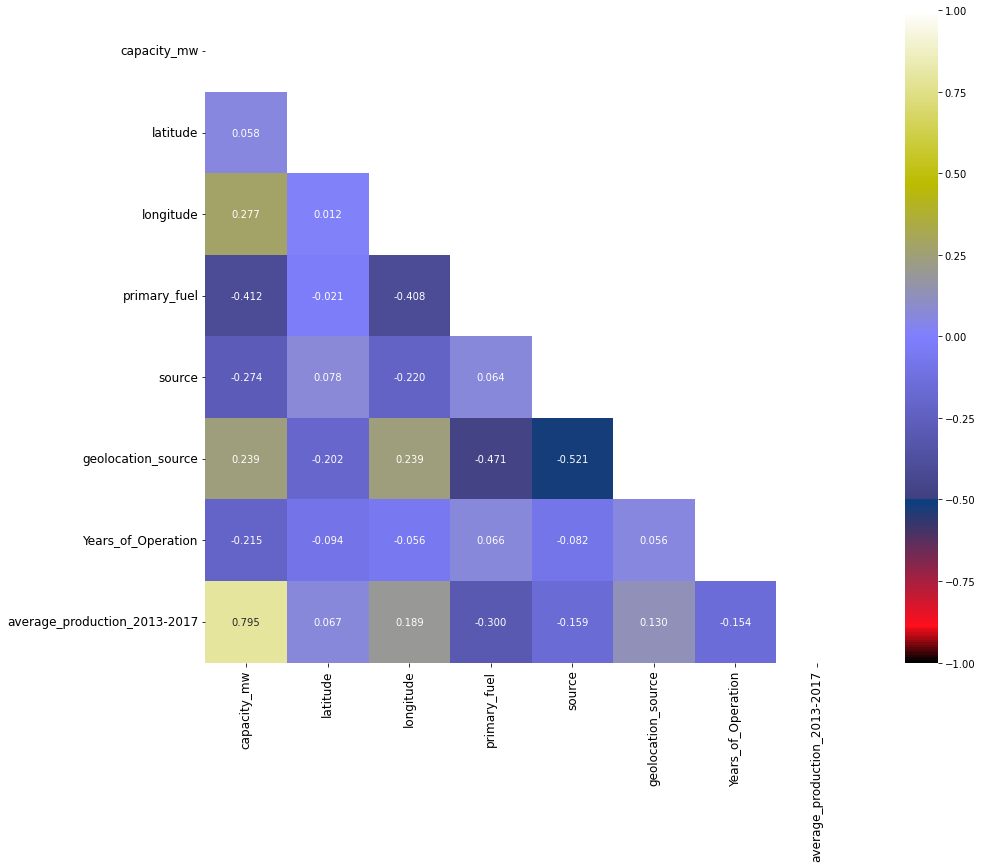

In [106]:
df_cor=df.corr()
upper_triangle = np.triu(df_cor)
plt.figure(figsize=(17,12))
sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.084983,latitude
1,1.315335,longitude
2,1.749797,primary_fuel
3,1.539726,source
4,1.999563,geolocation_source
5,1.060860,Years_of_Operation
6,1.086820,average_production_2013-2017


the vif is less than 10.There is no multicollinearity found.

# Model Building

In [108]:
#X,y already initialized
X.head()

,latitude,longitude,primary_fuel,source,geolocation_source,Years_of_Operation,average_production_2013-2017
0,1.172164,-0.799963,1.172259,1.576096,-1.057613,-1.102795,-0.083259
1,0.615387,-0.395248,-0.989206,3.121143,0.401404,0.034996,-0.083259
2,0.149044,-2.217705,1.604552,-0.515660,0.401404,0.034996,-0.083259
3,0.469562,2.303136,-0.556913,-0.491890,0.401404,-0.259166,-0.126764
4,0.158248,1.254599,-0.989206,-0.491890,0.401404,-1.777827,2.146078


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [109]:

# different algorithm going to use

lr=LinearRegression()
ls=Lasso()
Rd=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=100)
adr=AdaBoostRegressor(n_estimators=100)
knn=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [111]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2=r2_score(y_test,predlr)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.697058239745564  on random_state  70


In [112]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=70)

In [113]:
# different algorithm going to use

lr=LinearRegression()
ls=Lasso()
Rd=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=100)
adr=AdaBoostRegressor(n_estimators=100)
knn=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

In [114]:
#code for Training and Prediction for linear,lasso,Ridge regression
def evaluate(x):
    mod=x
    mod.fit(x_train,y_train)
    pred_train=mod.predict(x_train)
    pred_test=mod.predict(x_test)
    

    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred_test)*100),"\n")
    print("intercept is : ",mod.intercept_,"\n")
    print("Coefficient is  : ",mod.coef_,"\n")
    print("Score of trained data :",mod.score(x_train,y_train)*100,"\n")
    print("Score of test data :",mod.score(x_test,y_test)*100,"\n")
    
    print("Error")
    print("mean absolute error is : ",mean_absolute_error(y_test,pred_test))
    print("mean squared error is: ",mean_squared_error(y_test,pred_test))
    print("root mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred_test)))
    plt.scatter(x=y_test,y=pred_test,color='r')
    plt.plot(y_test,y_test,color='b')

In [115]:
#code for Training and Prediction for other models

def eval(x):
    mod=x
    print(mod)
    #training the data
    mod.fit(x_train,y_train)
    #Predicting the data
    pred_train=mod.predict(x_train)
    pred=mod.predict(x_test)
    
    print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100))
    print("\n")
    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred)*100))
    
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))
    print("mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred)))
    plt.scatter(x=y_test,y=pred,color='r')
    plt.plot(y_test,y_test,color='b')

r2_score for  test data is  69.71% 

intercept is :  275.35056932365535 

Coefficient is  :  [ -10.93476142   22.07331558 -108.68415506 -103.5729792   -17.46449899
  -60.12909606  241.96470641] 

Score of trained data : 56.96228159010058 

Score of test data : 69.70582397455641 

Error
mean absolute error is :  174.40207393611215
mean squared error is:  51844.86150205963
root mean squared error is:  227.6946672675046


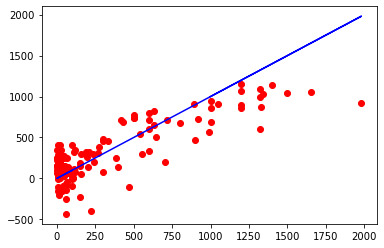

In [116]:
#calling linear model
evaluate(lr)


DecisionTreeRegressor()
r2_score for train data is 99.99%


r2_score for  test data is  50.73%


Error
mean absolute error :  125.75294372294373
mean squared error :  84322.65115366981
mean squared error is:  290.3836275578735


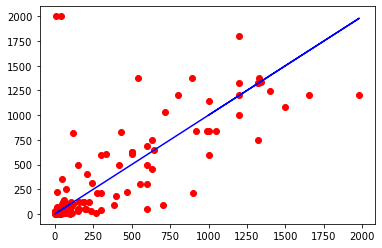

In [117]:
#calling DecisionTreeRegressor model
eval(dtr)

RandomForestRegressor()
r2_score for train data is 96.27%


r2_score for  test data is  76.97%


Error
mean absolute error :  102.84107523926973
mean squared error :  39406.89901933071
mean squared error is:  198.51171003074532


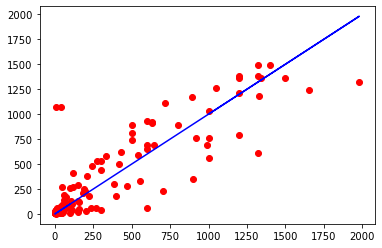

In [118]:
# RandomForestRegressor model
eval(rfr)

AdaBoostRegressor(n_estimators=100)
r2_score for train data is 73.55%


r2_score for  test data is  46.39%


Error
mean absolute error :  208.4788395846604
mean squared error :  91752.2131276503
mean squared error is:  302.90627779504723


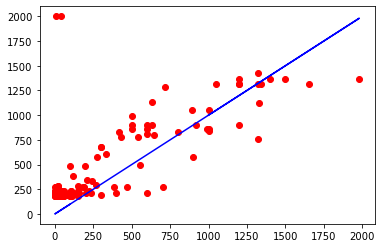

In [119]:
#calling AdaBoostRegressor model
eval(adr)

KNeighborsRegressor()
r2_score for train data is 82.32%


r2_score for  test data is  79.85%


Error
mean absolute error :  101.76107738095239
mean squared error :  34484.12911726119
mean squared error is:  185.69902831533932


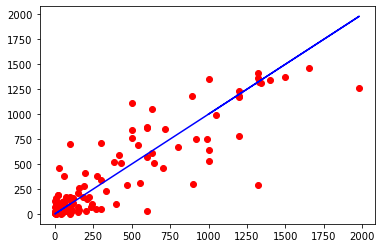

In [120]:
#calling KNeighborsRegressor model
eval(knn)

GradientBoostingRegressor()
r2_score for train data is 93.19%


r2_score for  test data is  60.15%


Error
mean absolute error :  115.92998056283174
mean squared error :  68200.00256106544
mean squared error is:  261.1513020474251


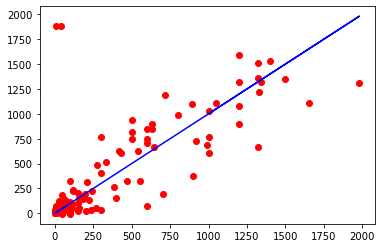

In [121]:
#calling GradientBoostingRegressor model
eval(gbr)

In [122]:
from numpy import absolute
model=[lr,dtr,rfr,adr,knn,gbr]
for m in model:
    score=cross_val_score(m,X,y,cv=5,scoring="r2")
    print(m,"Cross val score is ",score*100)
    score=absolute(score)
    print("mean is ",score.mean()*100,"\n\n")

LinearRegression() Cross val score is  [58.30139432 59.25181458 48.81464242 64.58509435 61.86891862]
mean is  58.5643728575785 


DecisionTreeRegressor() Cross val score is  [63.52937011 43.77190611 67.75941543 58.77209118 58.2724198 ]
mean is  58.421040527231774 


RandomForestRegressor() Cross val score is  [81.16467394 82.36405959 72.72612584 78.30849797 78.30413777]
mean is  78.5734990236303 


AdaBoostRegressor(n_estimators=100) Cross val score is  [67.36081619 52.51340772 62.10781504 60.3502498  55.81488356]
mean is  59.62943446230993 


KNeighborsRegressor() Cross val score is  [76.41130253 76.70848018 68.9710902  78.12343725 71.86021042]
mean is  74.41490411611869 


GradientBoostingRegressor() Cross val score is  [81.48246247 82.52280919 71.84796455 71.2226981  74.13827245]
mean is  76.24284135209656 




In [157]:
#parameters of randomforest classifier
grid_params = { 
    
    'n_estimators': [200,300,400,500],
    'criterion':['squared_error','absolute_error','poisson'],
    'max_depth' : range(2,20,3),
    'max_features':['sqrt','log2',None],
    'min_samples_leaf' :range(1,10,2),
    'min_samples_split' :range(2,10,2),
}

In [158]:
grid_search = GridSearchCV(rfr, grid_params, scoring='r2', cv=5, n_jobs=-1)

In [159]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 20, 3),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [200, 300, 400, 500]},
             scoring='r2')

In [160]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 17,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [161]:
h_rfr=RandomForestRegressor(criterion='squared_error',max_features='log2',n_estimators=200,max_depth=17, min_samples_leaf=5,min_samples_split=6)

RandomForestRegressor(max_depth=17, max_features='log2', min_samples_leaf=5,
                      min_samples_split=6, n_estimators=200)
r2_score for train data is 82.98%


r2_score for  test data is  84.87%


Error
mean absolute error :  98.98960043425242
mean squared error :  25901.28572848166
mean squared error is:  160.93876390876642


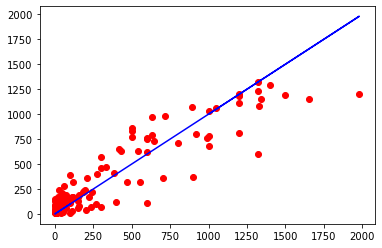

In [162]:
eval(h_rfr)

In [ ]:
we are able to increase the accuracy from  to 




















.So we will go with hypertuned svc() model.

In [155]:
rfr.best_params_

AttributeError: 'RandomForestRegressor' object has no attribute 'best_params_'

In [156]:
rfr.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# ii) Prediction and model building for Fuel_type

In [ ]:
X_1 = df_new.drop("Fuel_type",axis=1)
X_1 = df_new["Fuel_type"]